In [1]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo

def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

# Intro to pandas, matplotlib, seaborn, numpy, etc...
### Written by Reese Richardson for use in Biol Sci 378, Winter 2022, Northwestern University (rakr@u.northwestern.edu)

This notebook is designed to familiarize students with the essentials of using Python for data analysis in a genomics context. In this course, we will mostly be using Python as an easy way to illustrate concepts in genomics, so don't consider this a well-rounded tutorial. If you are interested in diving deeper into Python and becoming far more familiar with its many data science capabilities, I suggest you check out [NICO 101/401, taught by Adam Pah and Luis Amaral](https://amarallab.github.io/Introduction-to-Python-Programming-and-Data-Science/). We will be making heavy use of the libraries `pandas`, `matplotlib`, `seaborn`, and `numpy`, as well as a few others.

Because you are reading this, you have already learned how launch a Jupyter notebook (and have thus completed your first lesson)! Jupyter Notebook is an interpreter for Python that allows you to program within your web browser. The code still runs on your computer (the same way it would if you were to use the command line), but is much nicer for organization and visualization purposes. Below, you will see the basic unit of a Jupyter notebook--the cell. You can execute a cell by selecting it, then hitting Ctrl + Enter (Mac: Command + Enter). Execute the cell below.

In [ ]:
print("Hello, world!")

The YouTube video in the cell below (part of NICO 101) gives a great introduction on how best to use Jupyter notebooks. I suggest you watch it if you are struggling with the Jupyter interface.

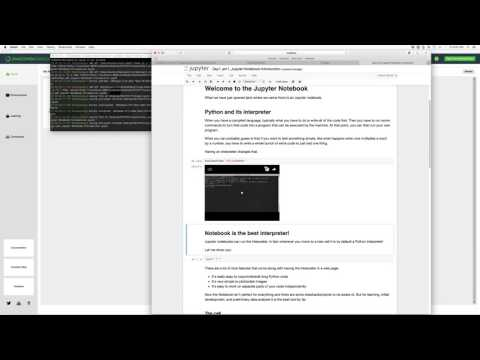

In [2]:
YouTubeVideo('Pul4cqoPLbE')

# 1.1 Importing libraries to use

First, we should import all the libraries we intend to use in this notebook. The libraries listed below come standard stock in Anaconda. We will cover how to import custom libraries later.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# Code in Python is 'commented out' when it is preceded by a hash sign. 
# Use comments to make your code more readable!

# 1.2 Importing DataFrames

You should already be familiar with basic data types in Python. If not, complete the [basic data types notebook](./python_data_types_biol_sci_378_2022_01_21.ipynb) in this folder. We're now going to introduce a data type that comes in the Python [pandas](https://pandas.pydata.org/) library (imported above): the DataFrame!

In [ ]:
zip_data = pd.read_csv('./chicago_covid_case_data_by_zip_20220116.csv')
zip_data

In the code block above, we imported a .csv file into python as a DataFrame (stored in the variable `zip_data`). DataFrames are 2-dimensional data types that stores information in columns and rows (like an Microsoft Excel/Google Sheets spreadsheet). The data stored inside a DataFrame can be of mixed types. For instance, in the DataFrame we imported, the dtype of the 'week' column is...

In [ ]:
zip_data['week'].dtype

...whereas the dtype of the 'zip' column is...

In [ ]:
zip_data['zip'].dtype

In case you haven't noticed, we can access individual columns in a DataFrame with the `[]` syntax.

In [ ]:
zip_data['absolute_week']

The datatype of this slice is a pandas Series. If we want this Series as a numpy array, we can use the `values` attribute.

In [ ]:
type(zip_data['absolute_week'])

In [ ]:
zip_data['absolute_week'].values

In [ ]:
type(zip_data['absolute_week'].values)

We can also create a new dataframe that only contains some columns of the original. We do this by passing a list of strings containing column names to the `[]` (remember, lists are also defined with `[]`).

In [ ]:
zip_data[['zip', 'tests', 'population']]

In [ ]:
col_names = ['zip', 'absolute_week','cases']
zip_data_cases = zip_data[col_names]
zip_data_cases

# 1.3 'Slicing' DataFrames

The sample dataset that we've imported is a pull of COVID-19 test, case, and death counts by ZIP code for the [City of Chicago](https://data.cityofchicago.org/Health-Human-Services/COVID-19-Cases-Tests-and-Deaths-by-ZIP-Code/yhhz-zm2v). Each row represents data from a single ZIP code for a single calendar week. The columns indicate:

* `row_id`: unique identifier for each row
* `zip`: ZIP code
* `week`: number of calendar week for that year
* `week_start_date`: start date of week
* `week_end_date`: end date of week
* `absolute_week`: number of weeks since March 1, 2020 (we'll be using this one, as working with the pd.DateTime datatype can often be finicky and you'll never (well, rarely) find a date attribute in genomics data)
* `tests`: number of COVID-19 diagnostic tests conducted for residents of a ZIP code in this calendar week
* `cases`: number of cases discovered among those tests
* `deaths`: COVID-19 attributable deaths among residents of this ZIP code in this calendar week (not necessarily among cases discovered that week)
* `population`: 2019 ZIP code population

This is a lot to consider at once! What if, for the moment, we only want to consider a single ZIP code?

To do so, we can actually pass a boolean array to the DataFrame to select just a handful of rows.

In [ ]:
zip_data['zip'] == 60620 # Our boolean array.

In [ ]:
zip_data[zip_data['zip'] == 60620] # Passing our boolean array to zip_data.

Excellent! Now we have a DataFrame that only contains data for the ZIP code 60620. However, our rows are out of order. How do we fix that?

In [ ]:
# sort the rows of this DataFrame by absolute_week, in ascending order.
zip_data_slice = zip_data[zip_data['zip'] == 60620].sort_values('absolute_week', ascending=True)
zip_data_slice

Great! Notice that the first column of the dataset, shown in bold, is now out of order. We call this column the DataFrame's `index`. There are a few things we can do with the index, shown below.

In [ ]:
zip_data_slice.reset_index()

In [ ]:
zip_data_slice.reset_index(drop=True)

In [ ]:
zip_data_slice.set_index('absolute_week')

In that last operation, we've set the column 'absolute_week' to be the new index. There are some advantages to this, but I've found that I rarely use the index column when working with genomics data. We'll stick with our original index, as it wasn't hurting anybody.

But now we have a new problem. In the 'cases' column of `zip_data_slice`, it appears that we have a `NaN` value in our first row.

In [ ]:
zip_data_slice['cases']

`NaN` (Not a Number) is a special value for float data that is usually used to denote a missing value. In our case, this value was missing in our input .csv. You can also get `NaN` if you perform an impossible mathematical operation (such as dividing by zero). When you encounter `NaN` in your data, you have a few options for how to deal with it...

In [ ]:
# Drop rows with NaN in a particular column from your dataframe.
zip_data_slice.dropna(subset=['cases'])

In [ ]:
# Fill all values of NaN with a given value (let's say 0.0).
zip_data_slice.fillna(0.0)

...finally, you can just leave it be! We'll be leaving `NaN`s in place for now. Be aware that each of these options can cause problems downstream (improper handling of NaN values has even led to the retraction of whole [Nature articles](https://www.nature.com/articles/s41586-021-03656-3))!

As another example of slicing, let's make a dataframe showing just the data for every ZIP code, but for absolute weeks 43 through 50.

In [ ]:
# Using '&' operator to combine two separate boolean series to get our desires range
zip_data[(zip_data['absolute_week'] >= 43) & (zip_data['absolute_week'] <= 50)]

# 1.4 Data Manipulation (the good kind!)

If you've been following any COVID-19 metrics over the course of the pandemic, you are probably most familiar with two: case counts and test positivity rate (TPR, or the number of positive tests per test conducted). With the data we have, we can calculate the case positivity rate (cases per test, or the number of cases discovered per test conducted), a close approximation of test positivity. Actually, we can calculate it all at once!

In [ ]:
# Divide the column 'cases' by the column 'tests', and use it to set a new column, 'cases_per_test'
zip_data['cases_per_test'] = zip_data['cases']/zip_data['tests']

Above, we created a new column in `zip_data` and set it equal to 'cases' divided by 'tests'. You can perform any mathematical operation on a DataFrame column. Let's create some more columns that will be useful later:

In [ ]:
# Divide the column 'tests' by the column 'population', and use it to set a new column, 'test_rate' (tests per capita)
zip_data['test_rate'] = zip_data['tests']/zip_data['population']
# Divide the column 'case' by the column 'population', and use it to set a new column, 'case_rate' (cases per capita)
zip_data['case_rate'] = zip_data['cases']/zip_data['population']
# Multiple the case_rate column by 100k to set a new column, 'cases_per_100k'
zip_data['cases_per_100k'] = zip_data['case_rate']*100000
# Let's see our DataFrame:
zip_data

Sometime, you might need another package to make a mathematical operation. For instance, what if we want the log (base 10) of the case rate per 100k? To do so, we'll make use of [NumPy](https://numpy.org/) (which we imported as `np`).

In [ ]:
# Take log of cases per 100k
zip_data['log10_cases_per_100k'] = np.log10(zip_data['cases_per_100k'])
zip_data

The last function I will mention that you might find quite useful for data manipulation is `groupby`. This function groups each row by its value in a particularly column and then perform an operation on the resulting collections of rows. For instance, we can group our dataset by 'absolute_week', then sum, in order to get case, test, and death counts for the whole city.

In [ ]:
zip_data.groupby('absolute_week').sum()

Notice that the columns that we calculated earlier get messed up by this operation. If we want sensical values, we will need to recalculate them. Notice also that the column that we grouped by is now the index column. Finally, notice that columns that can't be summed (like our 'row_id' and 'date' columns) won't show up in the resulting dataset.

Let's try grouping by ZIP code and summing to get total case, test, and death counts over the whole pandemic.

In [ ]:
zip_data.groupby('zip').sum()

# 1.5 Data visualization

[Exploring data via visualization is essential for data science](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1). Python has a number of libraries that make it easy! We'll be working with `matplotlib.pyplot` (imported as `plt`) and `seaborn` (imported as `sns`). Read through the code below to see these libraries in action.

### 1.5.1 Showing case positivity rate over time for a particular ZIP code (e.g. 60620)

In [ ]:
# Create the DataFrame we will be working with for this particular visualization.
zip_data_slice = zip_data[zip_data['zip'] == 60620].sort_values('absolute_week', ascending=True)

In [ ]:
plt.figure(figsize=(8,5)) #Create a 8 inch by 5 inch figure

plt.plot(zip_data_slice['absolute_week'], #Create a line plot that shows the 'absolute_week' column on the x-axis
         zip_data_slice['cases_per_test']) # and the 'cases_per_test' column on the y-axis

Well, it gets the job done, but it doesn't look very good. Let's make it look better.

In [ ]:
fig = plt.figure(figsize=(8,5)) #Create a 8 inch by 5 inch figure

plt.plot(zip_data_slice['absolute_week'], #Create a line plot that shows the 'absolute_week' column on the x axis
         zip_data_slice['cases_per_test'], # and the 'cases_per_test' column on the y axis
         linewidth=2, # with a thicker line
         color=sns.color_palette()[3]) # in red

plt.xlim([0,97]) # set the limits of the x axis to 0 and 97
plt.ylim([0,0.49]) # set the limits of y axis to 0 and 0.3

plt.xlabel(xlabel='weeks since Mar 1, 2020', fontsize=16) # set x label
plt.ylabel(ylabel='cases per test in 60620', fontsize=16) # set y label

ax = plt.gca() # get current axis (gca) and store it in 'ax'

ax.tick_params(labelsize=14) # set the fontsize of the tick labels

# some fancy line stuff
for pos in ['bottom', 'left']:
    ax.spines[pos].set_linewidth(1.25)
    ax.spines[pos].set_color('k') #black
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False) # turn off top and right side of frame
    
plt.grid(axis='y') # add grid lines to the y axis only

fig.savefig('cases_per_test_by_week_60620.png', # save figure as .png
            dpi=150, # dots per inch = 150 (resolution is 150 pixels per inch)
            bbox_inches='tight') # limit amount of white space around figure content

Much nicer!

### 1.5.2 Showing case positivity rate over time for two ZIPs code (e.g. 60615 and 60620)

In [ ]:
fig = plt.figure(figsize=(8,5)) #Create a 8 inch by 5 inch figure

zip_data_slice = zip_data[zip_data['zip'] == 60615].sort_values('absolute_week', ascending=True) # Make dataframe for 60615
plt.plot(zip_data_slice['absolute_week'], #Create a line plot that shows the 'absolute_week' column on the x axis
         zip_data_slice['case_rate'], # and the 'case_rate' column on the y axis
         linewidth=2, # with a thicker line
         color=sns.color_palette()[3], label='60615') # in red

zip_data_slice = zip_data[zip_data['zip'] == 60620].sort_values('absolute_week', ascending=True) # Make dataframe for 60620
plt.plot(zip_data_slice['absolute_week'], #Create a line plot that shows the 'absolute_week' column on the x axis
         zip_data_slice['case_rate'], # and the 'case_rate' column on the y axis
         linewidth=2, # with a thicker line
         color=sns.color_palette()[0], label='60620') # in blue

plt.xlim([0,97]) # set the limits of the x axis to 0 and 97
plt.ylim([0,0.02]) # set the limits of y axis to 0 and 0.3

plt.xlabel(xlabel='weeks since Mar 1, 2020', fontsize=16) # set x label
plt.ylabel(ylabel='weekly cases per capita', fontsize=16) # set y label

ax = plt.gca() # get current axis (gca) and store it in 'ax'

ax.tick_params(labelsize=14) # set the fontsize of the tick labels

# some fancy line stuff
for pos in ['bottom', 'left']:
    ax.spines[pos].set_linewidth(1.25)
    ax.spines[pos].set_color('k') #black
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False) # turn off top and right side of frame
    
plt.grid(axis='y') # add grid lines to the y axis only

plt.legend(fontsize=14, loc='upper right') #add a legend 
#(the legend function will keep track of the labels you added as you were plotting lines)

fig.savefig('cases_per_test_by_week_60615_60616.png', # save figure as .png
            dpi=150, # dots per inch = 150 (resolution is 150 pixels per inch)
            bbox_inches='tight') # limit amount of white space around figure content

### 1.5.3 Showing distribution of case rates for a given week

For this exercise, we'll be using `seaborn`.

In [ ]:
zip_data_slice = zip_data[zip_data['absolute_week'] == 90] # Create our dataframe for week 90 (week of November 21)
# Remove NaNs and infinite values from the case per 100k column (seaborn often does not like NaN values)
zip_data_slice = zip_data_slice.replace([np.inf, -np.inf], np.nan, inplace=False).dropna(subset=['cases_per_100k']) 

In [ ]:
sns.distplot(zip_data_slice['cases_per_100k']) #plot the distribution of the 'cases_per_100k' column

This distribution plot shows both a histogram and a kernel density estimate (an approximation of a continuous distribution). Again, we can make this look much better (and add some more information)!

In [ ]:
fig = plt.figure(figsize=(8,5)) # Create a 8 inch by 5 inch figure

bins = np.arange(0,500,25) # Define the bins to use for our histogram (0 to 500 in incrememnts of 25)

sns.distplot(zip_data_slice['cases_per_100k'], # plot distribution
             kde=False, # don't show the kernel density estimate
             norm_hist=False, # don't normalize the histogram (only works when kde=False)
             bins=bins) #define bins to use in histogram

plt.xlim([0,400]) # set the limits of the x axis to 0 and 97
plt.ylim([0,17]) # set the limits of y axis to 0 and 0.3

# Let's plot a vertical line showing the cases per 100k for all Chicago
all_chi = zip_data_slice['cases'].sum()/zip_data_slice['population'].sum()*100000 # define all-Chicago value

plt.axvline(x=all_chi, # place line at all_chi
            linestyle='dashed', # make the line dashed
            color=sns.color_palette()[3]) # in red

plt.text(s="{:.1f}".format(all_chi) + '\ncases per 100k\nacross all ZIPs', # add annotation
         x=all_chi+20, # at value of all_chi, scooted over a tad
         y=11, # y position of text
         fontsize=14, # label size
         color=sns.color_palette()[3]) # in red

plt.xlabel(xlabel='cases per 100k population, week 80', fontsize=16) # set x label
plt.ylabel(ylabel='number of ZIP codes', fontsize=16) # set y label

ax = plt.gca() # get current axis (gca) and store it in 'ax'

ax.tick_params(labelsize=14) # set the fontsize of the tick labels
ax.set_yticks(np.arange(0,20,5)) #set yticks to 0 to 20 in increments of 5

# some fancy line stuff
for pos in ['bottom', 'left']:
    ax.spines[pos].set_linewidth(1.25)
    ax.spines[pos].set_color('k') #black
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False) # turn off top and right side of frame
    
plt.grid(axis='y') # add grid lines to the y axis only

fig.savefig('cases_per_test_distribution_week_80.png', # save figure as .png
            dpi=150, # dots per inch = 150 (resolution is 150 pixels per inch)
            bbox_inches='tight') # limit amount of white space around figure content

Excellent!

### 1.5.4 Showing the relationship between testing rate and cases per test

The scatter plot is the data scientist's best friend. In transcriptomics, you might use a scatter plot to show the relationship (or lack thereof) between the expression of Gene A and Gene B. Let's see if we can use scatter plots to discover an interesting relationship in our data.

Looking at the plots from section 1.5.1 and 1.5.2, you might notice that the measure of cases per test in 60620 is by the highest at the start of the pandemic, but the cases per capita is highest in the last few weeks shown. Both metrics are popularly used to approximate disease burden, but here, they give contradictory findings. In fact, this finding holds for the whole city of Chicago:

In [ ]:
zip_data_all_chi = zip_data.groupby('absolute_week').sum() #group all rows by absolute_week, taking the sum

zip_data_all_chi['cases_per_test'] = zip_data_all_chi['cases']/zip_data_all_chi['tests'] # redefine our columns of interest
zip_data_all_chi['case_rate'] = zip_data_all_chi['cases']/zip_data_all_chi['population']

zip_data_all_chi = zip_data_all_chi.reset_index()

fig, ax1 = plt.subplots(figsize=(8,5)) # Create figure for which we can define two y axes

ax1.plot(zip_data_all_chi['absolute_week'], zip_data_all_chi['cases_per_test'], color=sns.color_palette()[0])

ax2 = ax1.twinx() # Create a duplicate y axis
ax2.plot(zip_data_all_chi['absolute_week'], zip_data_all_chi['case_rate'], color=sns.color_palette()[3])

ax1.text(s='cases per test', 
         transform=ax1.transAxes, multialignment='right', x=-0.40, y=0.5, 
         color=sns.color_palette()[0], fontsize=16)
ax2.text(s='weekly case rate',
         transform=ax1.transAxes, x=1.15, y=0.5, color=sns.color_palette()[3], fontsize=16)

ax1.set_ylim([0,0.36])
ax2.set_ylim([0,0.015])
ax1.set_xlim([-1,97])

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(False, axis='y')

If both of these metrics report on disease burden, they should follow the same trend, no? Which one should we trust more to measure disease burden?

Well, we know that there is far greater availability of diagnostic testing now than at the start of the pandemic, so maybe that's why we're finding way more cases as of late. 

The case positivity rate (AKA cases per test), on the other hand, normalizes for the volume of tests performed and shouldn't be subject to this bias. For instance, if two communities had the same disease burden at a given time but community A had more tests performed than community B, then while more cases might be discovered in community A, but the case positivity rates would be the same.

Right?

To confirm, why don't we show the relationship between the case positivity rate and testing rate per capita in each ZIP code in a given week? Let's say week 90.

In [ ]:
zip_data_slice = zip_data[zip_data['absolute_week'] == 90] # Create our dataframe for week 90 (week of November 21)
# Remove NaNs and infinite values
zip_data_slice = zip_data_slice.replace([np.inf, -np.inf], np.nan, inplace=False).dropna(subset=['cases_per_100k', 'test_rate', 'case_rate']) 

In [ ]:
fig = plt.figure(figsize=(6,5))

plt.scatter(x=zip_data_slice['test_rate'], y=zip_data_slice['cases_per_test']) # make a scatterplot.

plt.xlim([0,zip_data_slice['test_rate'].max()*1.1]) # set the limits of the x axis to 0 and 110% of the max of our x values
plt.ylim([0,zip_data_slice['cases_per_test'].max()*1.1]) # set the limits of y axis to 0 and 110% of the max of our y values

plt.xlabel(xlabel='tests per capita', fontsize=16) # set x label
plt.ylabel(ylabel='case positivity rate', fontsize=16) # set y label

plt.title(label='Week 80', loc='right', y=0.9, fontsize=16)
ax = plt.gca() # get current axis (gca) and store it in 'ax'

ax.tick_params(labelsize=14) # set the fontsize of the tick labels

# some fancy line stuff
for pos in ['bottom', 'left']:
    ax.spines[pos].set_linewidth(1.25)
    ax.spines[pos].set_color('k') #black
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

Wait a second! This doesn't make a lot of sense; the case positivity rate seems to decrease in areas where the testing rate per capita is higher. Let's improve our visualization by scaling the size of our dots by population and log-transforming our axes. Let's also change the week we're looking at to make sure this relationship is sustained.

In [ ]:
fig = plt.figure(figsize=(6,5))

zip_data_slice = zip_data[zip_data['absolute_week'] == 30] # Create our dataframe for week 90 (week of November 21)
# Remove NaNs and infinite values
zip_data_slice = zip_data_slice.replace([np.inf, -np.inf], np.nan, inplace=False).dropna(subset=['cases_per_100k', 'test_rate', 'case_rate']) 

# log-transforming our data may return a 'divide by zero' error. This is because we can't take log10(0)!
plt.scatter(x=np.log10(zip_data_slice['test_rate']), y=np.log10(zip_data_slice['cases_per_test']), # make a scatter plot
            s=2*np.sqrt(zip_data_slice['population']), # scale the size of our dots by population (s defines diameter, 
                                                       # so for the size of our dots to scale with population by area,
                                                       # we should take the square root.)
            alpha=0.3, # set transparency of dots to 30% so we can see overlapping circles
            linewidths=0) # get rid of the border on our markers.

plt.xlabel(xlabel=r'$log_{10}$(tests per capita)', fontsize=16) # set x label
plt.ylabel(ylabel=r'$log_{10}$(case positivity rate)', fontsize=16) # set y label

plt.title(label='Week 30', loc='right', y=0.9, fontsize=16) # set title

ax = plt.gca() # get current axis (gca) and store it in 'ax'

ax.tick_params(labelsize=14) # set the fontsize of the tick labels

# some fancy line stuff
for pos in ['bottom', 'left']:
    ax.spines[pos].set_linewidth(1.25)
    ax.spines[pos].set_color('k') #black
for pos in ['top', 'right']:
    ax.spines[pos].set_visible(False)

Huh! The case positivity rate appears to be inversely dependent on the overall testing rate, whereas we initially expected there to be no relationship. With a simple scatter plot, we've found something quite striking!

At the risk of spoiling the fun of discovery, as it turns out, the case positivity rate (and the test positivity rate) are better measures of testing availability in a particular area than of disease burden. When too little testing is available to a population, people will only go to the trouble of seeking out a test if they feel like they *really* need it. Hence, a greater proportion of those seeking testing will be symptomatic or will have had a definite exposure, driving up the test positivity rate.

In order to validate the relationship, we might want to perform a statistical test, but that's beyond the scope of this particular lesson.

# Congratulations!
## You've reached the end of our first lesson!

The data we worked with today is a far cry from the data one regularly works with in genomics. However, you'll find in your data science journey that many of the same lessons will apply across a diverse body of datasets. To practice your skills, complete the excercises below.

# Exercises

#### Exercise 1.1
What Chicago ZIP code has experienced the greatest number of COVID-19 deaths since the start of 2021 (week 44 onward)? *Hint: take a slice of the dataframe `zip_data`, then use `groupby`.*

#### Exercise 1.2
How many diagnostic tests were conducted in Week 65 across the entire city of Chicago?

#### Exercise 1.3
Make an interesting data visualization using this data. It can be anything you want! Feel free to play off of one of the visualizations we already made above.